# **Ulangan Tengah Semester**

## **1. KNN (K-Nearest Neighbor)**

untuk menyembunyikan warning

In [34]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
#Import semua library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [36]:
#Memasukkan Dataset
columns = ["Age","BMI","Glucose","Insulin","HOMA","Leptin","Adiponectin","Resistin","MCP.1","Classification"]
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv'
cancer = pd.read_csv(url)
x = cancer.drop(["Classification"], axis = 1)
x

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


Selanjutnya pilih variabel yang merupakan varaiabel dependent yang diberi nama y. Variabel dependent pada kasus ini adalah Classification.

In [37]:
#variabel dependen
y = cancer [["Classification"]]
y

,Classification
0,1
1,1
2,1
3,1
4,1
...,...
111,2
112,2
113,2
114,2


Data kanker payudara akan dibagi menjadi 2 bagian yaitu x test dan x train bagi variabel independent, y test dan y train bagi variabel dependent.

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

Kemudian membuat atau mengaktifkan fungsi klasifikasi k-nearest neighbor yang diri nama ‘classifier’ dan jumlah ketetanggaan adalah 5.

In [39]:
clf_knn = KNeighborsClassifier(n_neighbors=5)

Masukkan data yang akan dianalisis kedalam model k- nearest neighbor. Data yang dimasukkan merupakan variabel x dan y dari data training.

In [40]:
clf_knn.fit(x_train, y_train)

KNeighborsClassifier()

Lalu tentukan hasil prediksi dengan model diatas dari data kanker yang dibagi menjadi x test.

In [41]:
y_pred = clf_knn.predict(x_test)
y_pred

array([2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1])

Hasil y prediksi dari data test adalah sebanyak 24 data dengan 8 data diklasifikasikan sebagai healthy controls dan 16 lainnya adalah patients.

In [42]:
clf_knn.predict_proba(x_test)

array([[0. , 1. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.4, 0.6],
       [0. , 1. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.8, 0.2]])

In [43]:
print(confusion_matrix(y_test, y_pred))

[[3 7]
 [5 9]]


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.38      0.30      0.33        10
           2       0.56      0.64      0.60        14

    accuracy                           0.50        24
   macro avg       0.47      0.47      0.47        24
weighted avg       0.48      0.50      0.49        24



Untuk mengetahui nilai akurasi dengan model yang ada maka lakukan perhitungan berikut : (True Positive / True Negative )/ n

In [45]:
acc_train_knn = clf_knn.score(x_train, y_train)
acc_test_knn = clf_knn.score(x_test, y_test)
print('Accuracy Training : ', round(acc_train_knn*100, 2), '%')
print('Accuracy Testing : ', acc_test_knn*100, '%')

Accuracy Training :  77.17 %
Accuracy Testing :  50.0 %


## **2. Decision Tree**

In [46]:
from sklearn import tree
from matplotlib import pyplot as plt
#Create decision tree classifier
clf_tree = tree.DecisionTreeClassifier(criterion="entropy")
clf_tree = clf_tree.fit(x_train, y_train)

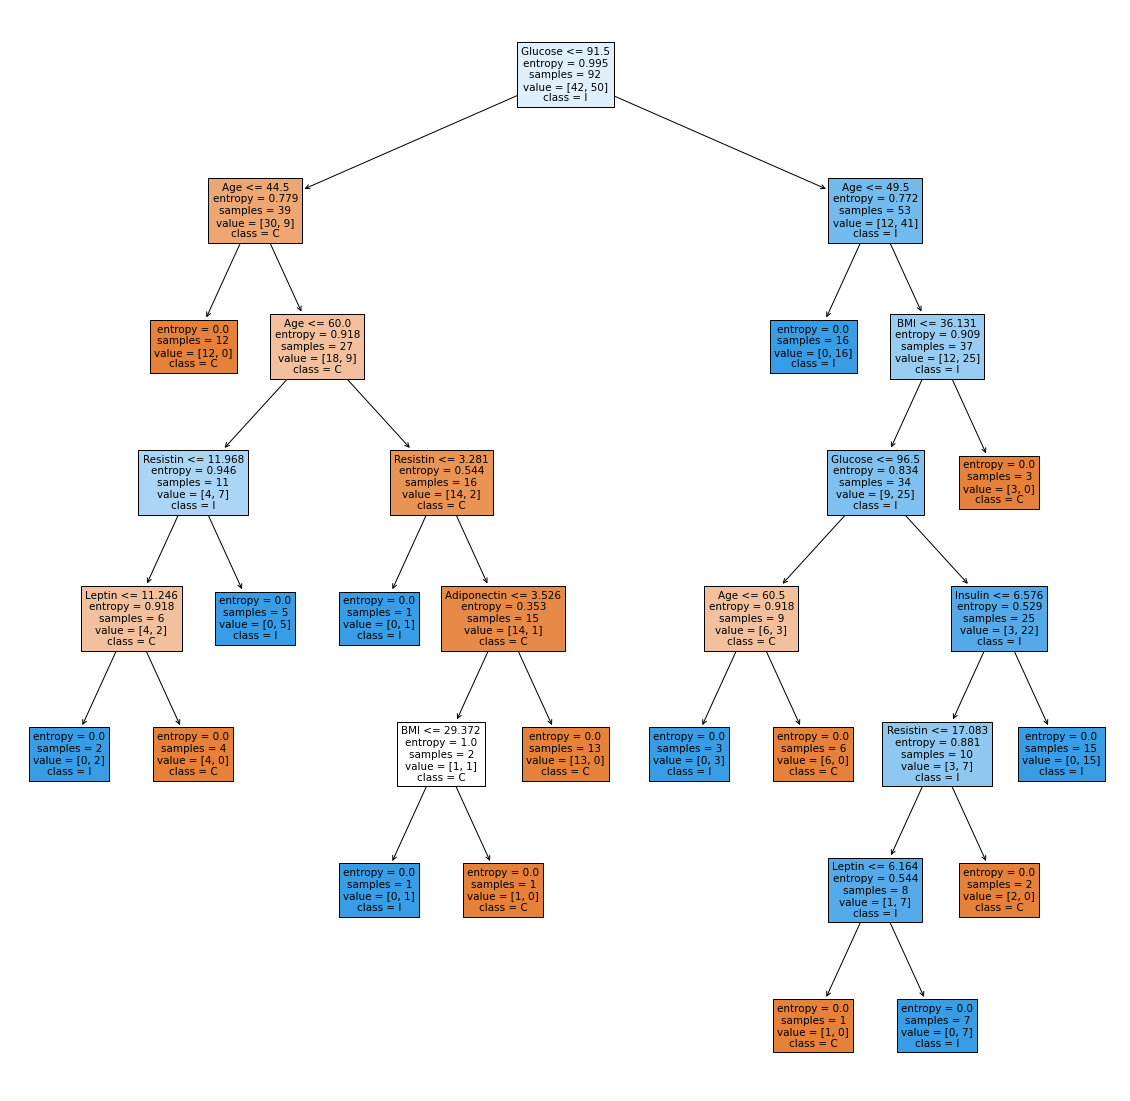

In [47]:
fig = plt.figure(figsize=(20, 20))
_ = tree.plot_tree(clf_tree, feature_names=list(cancer.columns.values)[:9],class_names=list(cancer.columns.values)[9], filled = True)

Menghitung Akurasidari Decision Tree

In [48]:
acc_train_tree = clf_tree.score(x_train, y_train)
acc_test_tree = clf_tree.score(x_test, y_test)

print("score akurasi data train :", round(acc_train_tree*100, 2), '%')
print("score akurasi data test :", round(acc_test_tree*100, 2), '%')

score akurasi data train : 100.0 %
score akurasi data test : 62.5 %
